In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%matplotlib notebook
sns.set(style="ticks")

# 1) Текстовое описание набора данных

В качестве набора данных мы будем использовать набор данных по сегментации клиентов торгового центра - https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python


Датасет состоит из одного файла:

Mall_Customers.csv - обучающая выборка

Каждый файл содержит следующие колонки:
+ CustomerID - уникальный ключ покупателя;
+ Gender - пол покупателя;
+ Age - возраст покупателя;
+ Annual Income (k$) - годовой доход клиента;
+ Spending Score (1-100) - оценка, присваиваемая торговым центром на основе поведения клиента и характера расходов.

In [24]:
raw_data = pd.read_csv('datasets/Mall_Customers.csv', sep=",")
data = pd.read_csv('datasets/Mall_Customers.csv', usecols=['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], sep=",")

# 2) Основные характеристики датасета

In [26]:
raw_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
total_count = raw_data.shape
print(f'Всего строк: {total_count[0]}\nВсего столбцов: {total_count[1]}')

Всего строк: 200
Всего столбцов: 5


In [28]:
# Колонки
raw_data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [29]:
# Количество пустых значений
for col in raw_data.columns:
    temp_null_count = raw_data[raw_data[col].isnull()].shape[0]
    print(f'{col} - {temp_null_count}')

CustomerID - 0
Gender - 0
Age - 0
Annual Income (k$) - 0
Spending Score (1-100) - 0


In [30]:
# Основные статистические характеристки набора данных
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# 3) Визуальное исследование датасета

## Диаграмма рассеяния

Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены (например, по времени).

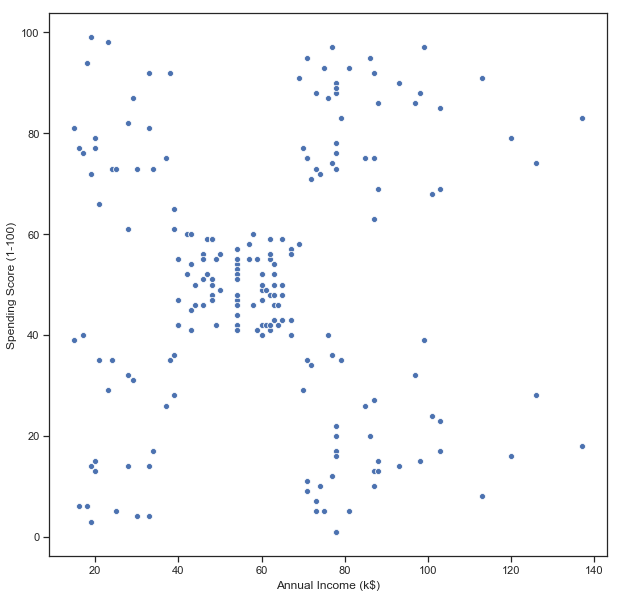

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='Annual Income (k$)', y='Spending Score (1-100)', data=data)

Можно видеть что между полями Annual Income и Spending Score пристутствует зависимость.

## Гистограмма

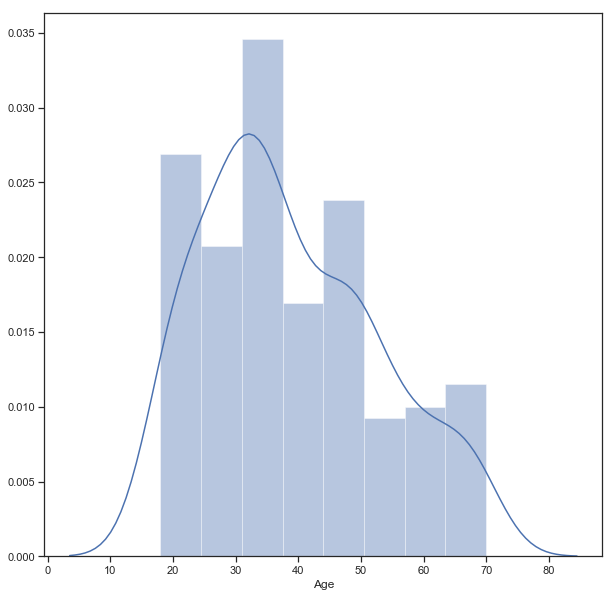

In [9]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Age'])

## Jointplot

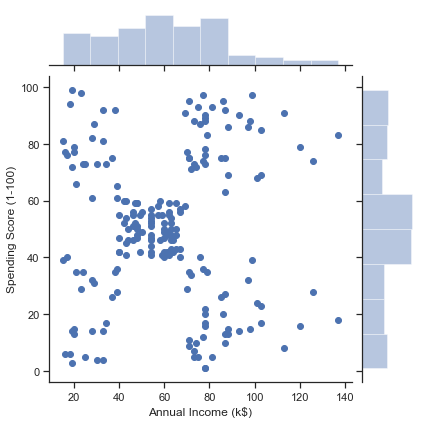

In [10]:
sns.jointplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data)

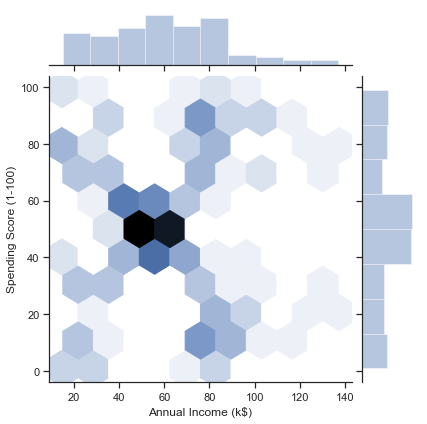

In [11]:
sns.jointplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, kind="hex")

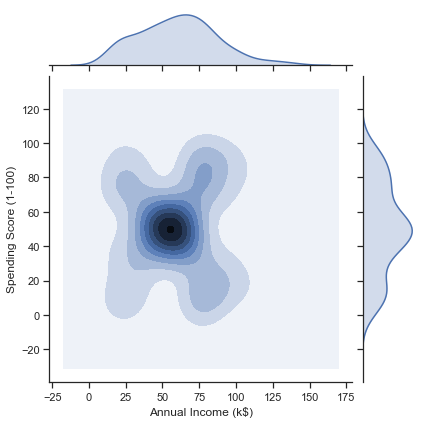

In [12]:
sns.jointplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, kind="kde")

## Парные диаграммы

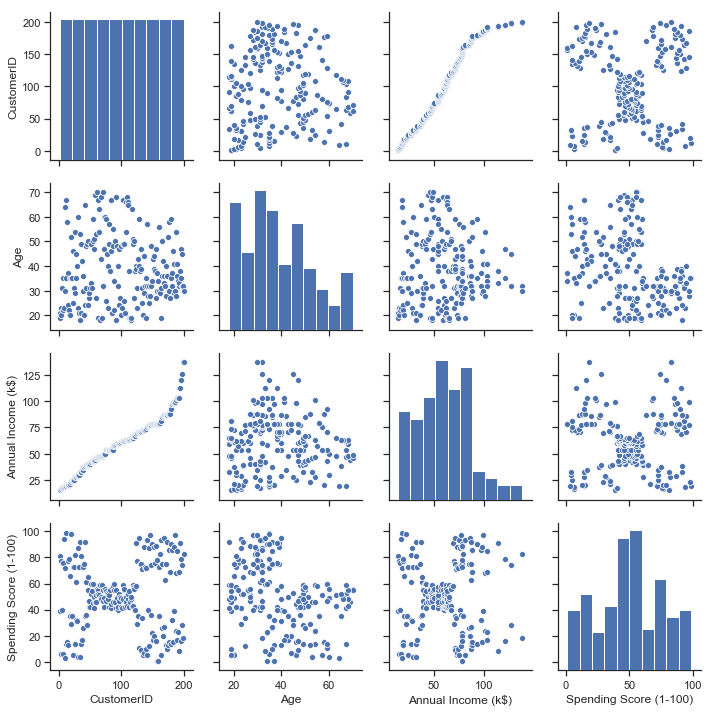

In [13]:
sns.pairplot(data)

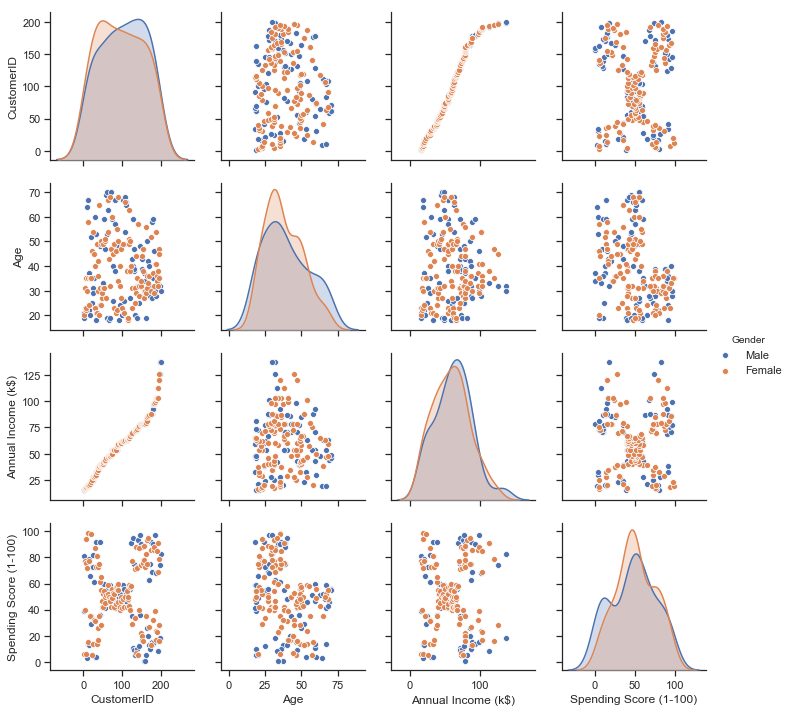

In [17]:
# Группировка по значению признака 
sns.pairplot(data, hue="Gender")

# Ящик с усами

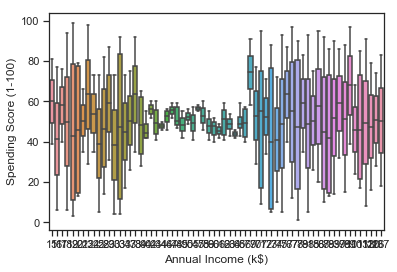

In [16]:
# Распределение параметра Annual Income сгруппированные по Spending Score.
sns.boxplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data)

# Violinplot

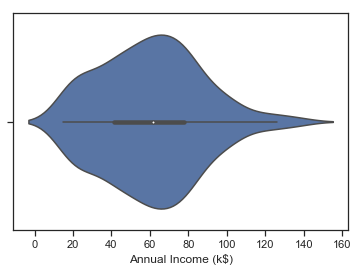

In [18]:
sns.violinplot(x=data['Annual Income (k$)'])

# 4) Информация о корреляции признаков

In [33]:
data.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [34]:
data.corr(method='pearson')

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [35]:
data.corr(method='kendall')

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,0.008198,-0.210757
Annual Income (k$),0.008198,1.000000,-0.000765
Spending Score (1-100),-0.210757,-0.000765,1.000000


На основе корреляционной матрицы можно сделать следующие выводы:

+ Целевой признак (Spending Score) наиболее коррелирует с возрастом (0.32), чем с доходом.
+ Возраст и доход слабо коррелируют между собой.
+ Три метода дают схожие значения.

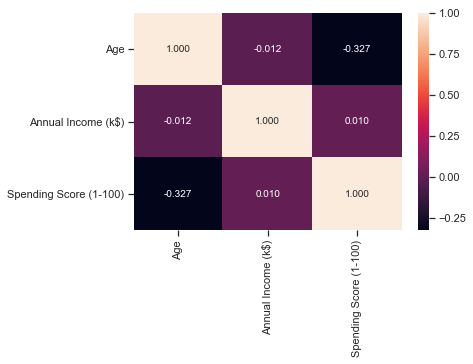

In [39]:
# Тепловая карта
sns.heatmap(data.corr(), annot=True, fmt='.3f')

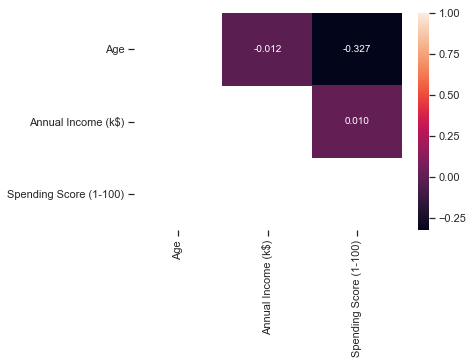

In [40]:
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')